reference pages:
- https://lumiamitie.github.io/r/python/tsne-for-r-py/
- https://rfriend.tistory.com/414
- https://github.com/DmitryUlyanov/Multicore-TSNE

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

from MulticoreTSNE import MulticoreTSNE as multiTSNE

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

## 01. cont (generator) vs dis (generator)

In [2]:
# data load

data_1 = np.load('../data/cont4paper.npy')
data_2 = np.load('../data/gen17dis18.npy')

data_merge = np.concatenate( (data_1, data_2), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (20000, 300)


In [58]:
# start = time.time()

# # t-SNE
# tsne_result_01_p30 = TSNE(learning_rate=200, init='pca', perplexity=30).fit_transform(data_merge)

# # multicore t-SNE
# # tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

# print("time (min) :", (time.time() - start) / 60.0 ) 

In [59]:
# # data plot

# df_tnse_result_01_p30 = pd.DataFrame(tsne_result_01_p30,
#                                      columns=['V1', 'V2'])

# df_tnse_result_01_p30["label"] = 'cont_gen_p30'
# df_tnse_result_01_p30["label"][len(data_1):] = 'dis_gen_p30'

# sns.scatterplot(x='V1', 
#                 y='V2', 
#                 hue='label', # different colors by group
#                 style='label', # different shapes by group
#                 s=20, # marker size
#                 data=df_tnse_result_01_p30)
# plt.show()

In [6]:
start = time.time()

# t-SNE
tsne_result_01_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 ) 

time (min) : 4.3699829777081804


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


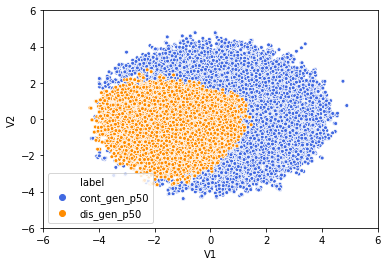

In [115]:
# data plot

df_tnse_result_01_p50 = pd.DataFrame(tsne_result_01_p50,
                              columns=['V1', 'V2'])

df_tnse_result_01_p50["label"] = 'cont_gen_p50'
df_tnse_result_01_p50["label"][len(data_1):] = 'dis_gen_p50'

fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue', 'darkorange'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_01_p50)
plt.show()

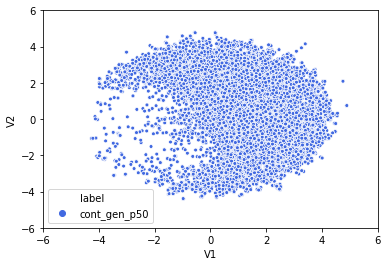

In [130]:
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
#                 style='label', # different shapes by group
                s=15, # marker size,
                palette=["royalblue"],   # color
                data=df_tnse_result_01_p50[0:10000])
plt.show()

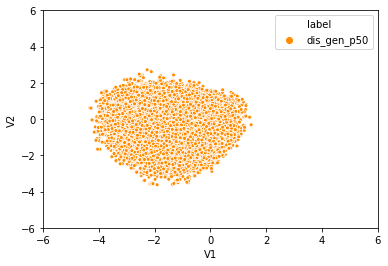

In [131]:
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
#                 style='label', # different shapes by group
                s=15, # marker size,
                palette=["darkorange"],   # color
                data=df_tnse_result_01_p50[10000:])
plt.show()

## 02. cont (encoder) vs dis (encoder)

In [9]:
# data load

data_1 = np.load('../data/cont4paper_train_real.npy')
data_2 = np.load('../data/gen17dis18_train_real.npy')

data_merge = np.concatenate( (data_1, data_2), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (20000, 300)


In [10]:
start = time.time()

# t-SNE
tsne_result_02_p30 = TSNE(learning_rate=200, init='pca', perplexity=30).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 ) 

time (min) : 2.232809591293335


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


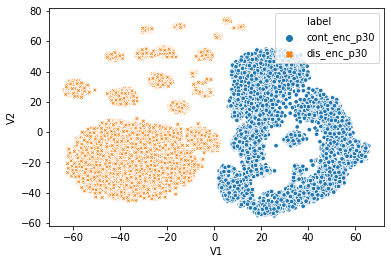

In [11]:
# data plot

df_tnse_result_02_p30 = pd.DataFrame(tsne_result_02_p30,
                              columns=['V1', 'V2'])

df_tnse_result_02_p30["label"] = 'cont_enc_p30'
df_tnse_result_02_p30["label"][len(data_1):] = 'dis_enc_p30'

sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_02_p30)
plt.show()

In [12]:
start = time.time()

# t-SNE
tsne_result_02_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 )

time (min) : 2.375141231218974


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


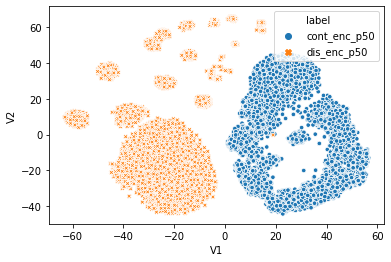

In [13]:
# data plot

df_tnse_result_02_p50 = pd.DataFrame(tsne_result_02_p50,
                              columns=['V1', 'V2'])

df_tnse_result_02_p50["label"] = 'cont_enc_p50'
df_tnse_result_02_p50["label"][len(data_1):] = 'dis_enc_p50'

sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_02_p50)
plt.show()

## 03. cont (gen), dis (gen), cont (enc), dis (enc)

In [14]:
# data load

data_1 = np.load('../data/cont4paper.npy')
data_2 = np.load('../data/gen17dis18.npy')
data_3 = np.load('../data/cont4paper_train_real.npy')
data_4 = np.load('../data/gen17dis18_train_real.npy')

data_merge = np.concatenate( (data_1, data_2, data_3, data_4), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (40000, 300)


In [55]:
# start = time.time()

# # t-SNE
# tsne_result_03_p30 = TSNE(learning_rate=200, init='pca', perplexity=30).fit_transform(data_merge)

# # multicore t-SNE
# # tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

# print("time (min) :", (time.time() - start) / 60.0 )

In [56]:
# # data plot

# df_tnse_result_03_p30 = pd.DataFrame(tsne_result_03_p30,
#                               columns=['V1', 'V2'])

# df_tnse_result_03_p30["label"] = 'cont_gen_p30'
# df_tnse_result_03_p30["label"][len(data_1):] = 'dis_gen_p30'
# df_tnse_result_03_p30["label"][len(data_1)+len(data_2):] = 'con_enc_p30'
# df_tnse_result_03_p30["label"][len(data_1)+len(data_2)+len(data_3):] = 'dis_enc_p30'

# sns.scatterplot(x='V1', 
#                 y='V2', 
#                 hue='label', # different colors by group
#                 style='label', # different shapes by group
#                 s=20, # marker size
#                 data=df_tnse_result_03_p30)
# plt.show()

In [31]:
start = time.time()

# t-SNE
tsne_result_03_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 )

time (min) : 15.439414672056834


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

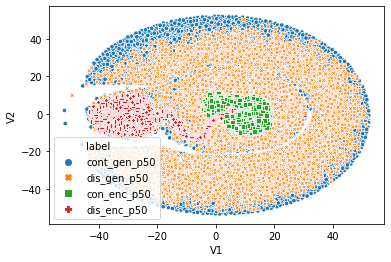

In [32]:
# data plot

df_tnse_result_03_p50 = pd.DataFrame(tsne_result_03_p50,
                              columns=['V1', 'V2'])

df_tnse_result_03_p50["label"] = 'cont_gen_p50'
df_tnse_result_03_p50["label"][len(data_1):] = 'dis_gen_p50'
df_tnse_result_03_p50["label"][len(data_1)+len(data_2):] = 'con_enc_p50'
df_tnse_result_03_p50["label"][len(data_1)+len(data_2)+len(data_3):] = 'dis_enc_p50'

fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_03_p50)
plt.show()

## 04. cont (encoder), cont (generator)

In [132]:
# data load

data_1 = np.load('../data/cont4paper_train_real.npy')
data_2 = np.load('../data/cont4paper.npy')

data_merge = np.concatenate( (data_1, data_2), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (20000, 300)


In [133]:
start = time.time()

# t-SNE
tsne_result_04_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 ) 

time (min) : 4.424275747934977


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


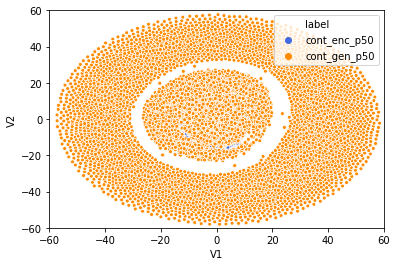

In [136]:
# data plot

df_tnse_result_04_p50 = pd.DataFrame(tsne_result_04_p50,
                                     columns=['V1', 'V2'])

df_tnse_result_04_p50["label"] = 'cont_enc_p50'
df_tnse_result_04_p50["label"][len(data_1):] = 'cont_gen_p50'

fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue', 'darkorange'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_04_p50)
plt.show()

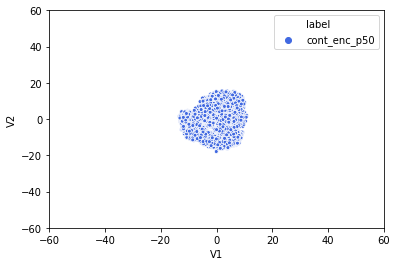

In [139]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_04_p50[:10000])
plt.show()

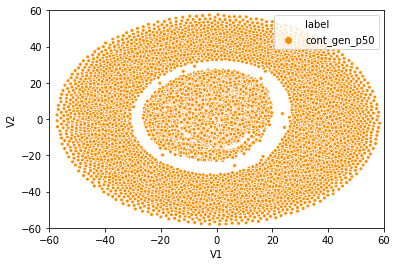

In [140]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['darkorange'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_04_p50[10000:])
plt.show()

## 05. dis (encoder), dis (generator)

In [141]:
# data load

data_1 = np.load('../data/gen17dis18_train_real.npy')
data_2 = np.load('../data/gen17dis18.npy')

data_merge = np.concatenate( (data_1, data_2), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (20000, 300)


In [142]:
start = time.time()

# t-SNE
tsne_result_05_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 ) 

time (min) : 4.29841794570287


/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


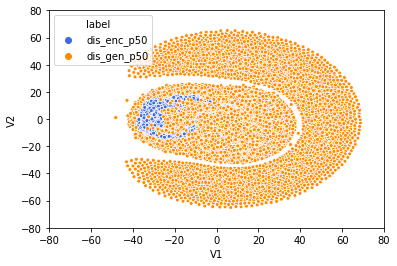

In [146]:
# data plot

df_tnse_result_05_p50 = pd.DataFrame(tsne_result_05_p50,
                                     columns=['V1', 'V2'])

df_tnse_result_05_p50["label"] = 'dis_enc_p50'
df_tnse_result_05_p50["label"][len(data_1):] = 'dis_gen_p50'

fig, ax = plt.subplots()
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue', 'darkorange'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_05_p50)
plt.show()

/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


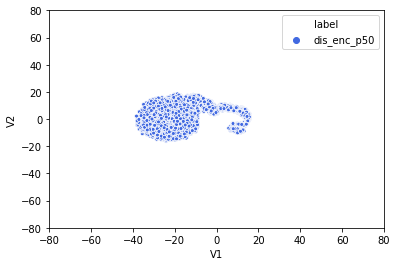

In [147]:
# data plot

df_tnse_result_05_p50 = pd.DataFrame(tsne_result_05_p50,
                                     columns=['V1', 'V2'])

df_tnse_result_05_p50["label"] = 'dis_enc_p50'
df_tnse_result_05_p50["label"][len(data_1):] = 'dis_gen_p50'

fig, ax = plt.subplots()
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_05_p50[:10000])
plt.show()

/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


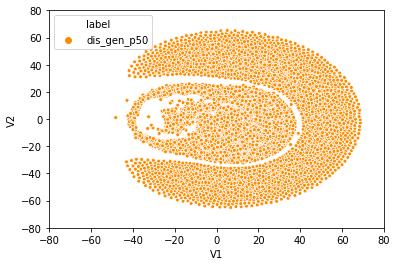

In [148]:
# data plot

df_tnse_result_05_p50 = pd.DataFrame(tsne_result_05_p50,
                                     columns=['V1', 'V2'])

df_tnse_result_05_p50["label"] = 'dis_enc_p50'
df_tnse_result_05_p50["label"][len(data_1):] = 'dis_gen_p50'

fig, ax = plt.subplots()
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['darkorange'],
#                 style='label', # different shapes by group
                s=15, # marker size
                data=df_tnse_result_05_p50[10000:])
plt.show()

## 05. cont (gen), dis (gen), cont (enc), dis (enc), AE

In [150]:
# data load

data_1 = np.load('../data/cont4paper.npy')
data_2 = np.load('../data/gen17dis18.npy')
data_3 = np.load('../data/cont4paper_train_real.npy')
data_4 = np.load('../data/gen17dis18_train_real.npy')
data_5 = np.load('../data/ae_train_real.npy')

data_merge = np.concatenate( (data_1, data_2, data_3, data_4, data_5), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (50000, 300)


In [ ]:
start = time.time()

# t-SNE
tsne_result_06_p50 = TSNE(learning_rate=200, init='pca', perplexity=50).fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=200, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 )

/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

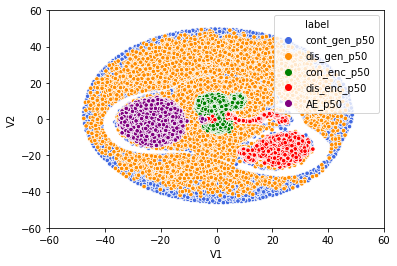

In [154]:
# data plot

df_tnse_result_06_p50 = pd.DataFrame(tsne_result_06_p50,
                                     columns=['V1', 'V2'])

df_tnse_result_06_p50["label"] = 'cont_gen_p50'
df_tnse_result_06_p50["label"][len(data_1):] = 'dis_gen_p50'
df_tnse_result_06_p50["label"][len(data_1)+len(data_2):] = 'con_enc_p50'
df_tnse_result_06_p50["label"][len(data_1)+len(data_2)+len(data_3):] = 'dis_enc_p50'
df_tnse_result_06_p50["label"][len(data_1)+len(data_2)+len(data_3)+len(data_4):] = 'AE_p50'

fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue', 'darkorange', 'green', 'red', 'purple'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50)
plt.show()

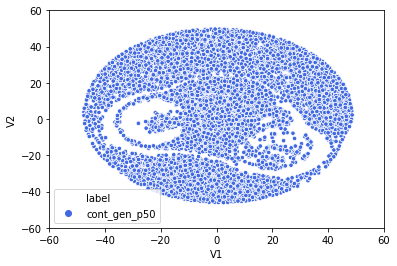

In [161]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['royalblue'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50[0:10000])
plt.show()

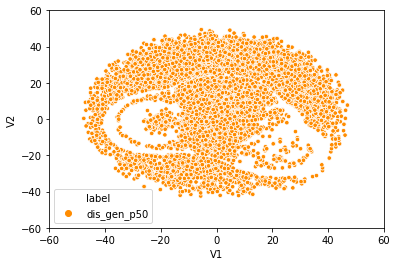

In [162]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['darkorange'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50[10000:20000])
plt.show()

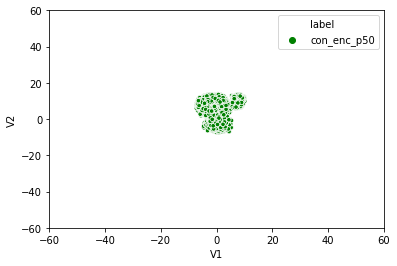

In [163]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['green'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50[20000:30000])
plt.show()

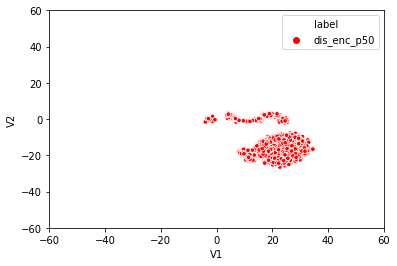

In [164]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['red'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50[30000:40000])
plt.show()

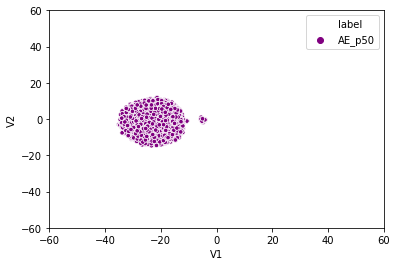

In [165]:
fig, ax = plt.subplots()
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                palette=['purple'],
#                 style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result_06_p50[40000:50000])
plt.show()

## example

In [69]:
# iris 데이터
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 결과물 재현을 위해 seed를 설정
np.random.seed(1)

# iris 데이터를 matrix로 변환시킨 후 t-SNE 적용
iris_matrix = iris.iloc[:, 0:4].values
iris_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(iris_matrix)

# 맵핑된 결과물에 원래의 레이블을 달아보자
df_iris_tsne_result = (
  pd.DataFrame(iris_tsne_result, columns=['V1', 'V2'])
    .assign(species = iris['species'])
)

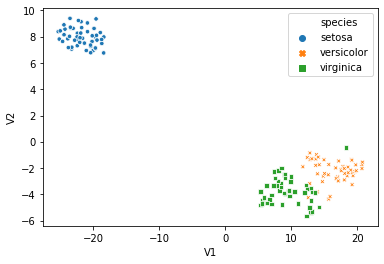

In [70]:
sns.scatterplot(x='V1', 
                y='V2', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=20, # marker size
                data=df_iris_tsne_result)
plt.show()